# 6.2 Exploring Relations

This script contains the following points:
### 1. Library and Data Import
### 2. Adding new columns
### 3. Heatmap
### 4. Scatterplot
### 5. Pair plot
### 6. Categorial plot


## 1. Library and Data Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#Checking version of matplotlib to avoid possible errors from lower version
matplotlib.__version__

'3.5.1'

In [3]:
# Defining path
path = r'C:\Users\chris\OneDrive\Desktop\Data Analytics CF\06_Advanced Analytics\02_Prepared Data'

In [4]:
# Importing data
df = pd.read_csv(os.path.join(path, 'data_appended.csv'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60699 entries, 0 to 60698
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          60699 non-null  int64  
 1   tourney_id          60699 non-null  object 
 2   tourney_name        60699 non-null  object 
 3   surface             60699 non-null  object 
 4   draw_size           60699 non-null  int64  
 5   tourney_level       60699 non-null  object 
 6   tourney_date        60699 non-null  object 
 7   match_num           60699 non-null  int64  
 8   winner_id           60699 non-null  int64  
 9   winner_seed         25552 non-null  float64
 10  winner_entry        7556 non-null   object 
 11  winner_name         60699 non-null  object 
 12  winner_hand         60690 non-null  object 
 13  winner_ht           57934 non-null  float64
 14  winner_ioc          60699 non-null  object 
 15  winner_age          60697 non-null  float64
 16  lose

In [6]:
# Adjusting datatype for winner and loser id to string
df['winner_id'] = df['winner_id'].astype('str')
df['loser_id'] = df['loser_id'].astype('str')

In [7]:
# Setting chart display
%matplotlib inline

## 2. Adding new columns

In [8]:
# The data presents absolute counts, these need to be converted into rates to make them more comparable

In [9]:
# Calculating percentage of aces hit per service point played
w_ace_percentage = (df['w_ace']/df['w_svpt'])
l_ace_percentage = (df['l_ace']/df['l_svpt'])

In [10]:
# Calculating First Serve Percentage
w_1stServe_Percentage = (df['w_1stIn']/df['w_svpt'])
l_1stServe_Percentage = (df['l_1stIn']/df['l_svpt'])                    

In [11]:
# Calculating First Serve Win Percentage
w_1stServe_winpercentage = (df['w_1stWon']/df['w_1stIn'])
l_1stServe_winpercentage = (df['l_1stWon']/df['l_1stIn'])

In [12]:
# Calculating Second Serve Win Percentage
w_2ndServe_winpercentage = (df['w_2ndWon']/(df['w_svpt'] - df['w_1stIn'])) # Total number of service points minus 1st in = total 2nd serve
l_2ndServe_winpercentage = (df['l_2ndWon']/(df['l_svpt'] - df['l_1stIn']))

In [13]:
# Calculating average points played per service game
w_avg_points_per_servicegame = (df['w_svpt']/df['w_SvGms'])
l_avg_points_per_servicegame = (df['l_svpt']/df['l_SvGms'])

In [14]:
# Adding columns for the above calculated results
df = df.assign(w_ace_pct = w_ace_percentage)
df = df.assign(l_ace_pct = l_ace_percentage)
df = df.assign(w_1st_pct = w_1stServe_Percentage)
df = df.assign(l_1st_pct = l_1stServe_Percentage)
df = df.assign(w_1stS_WinPct = w_1stServe_winpercentage)
df = df.assign(l_1stS_WinPct = l_1stServe_winpercentage)
df = df.assign(w_2ndS_WinPct = w_2ndServe_winpercentage)
df = df.assign(l_2ndS_WinPct = l_2ndServe_winpercentage)
df = df.assign(w_PpSgm = w_avg_points_per_servicegame)
df = df.assign(l_PpSgm = l_avg_points_per_servicegame)

In [15]:
df

Unnamed: 0                        tourney_id  \
0               0                         2002-1536   
1               1                         2002-1536   
2               2                         2002-1536   
3               3                         2002-1536   
4               4                         2002-1536   
...           ...                               ...   
60694       60694  2022-M-DC-2022-WG2-PO-GRE-JAM-01   
60695       60695  2022-M-DC-2022-WG2-PO-GRE-JAM-01   
60696       60696  2022-M-DC-2022-WG2-PO-HKG-BEN-01   
60697       60697  2022-M-DC-2022-WG2-PO-HKG-BEN-01   
60698       60698  2022-M-DC-2022-WG2-PO-HKG-BEN-01   

                       tourney_name surface  draw_size tourney_level  \
0                    Madrid Masters    Hard         48             M   
1                    Madrid Masters    Hard         48             M   
2                    Madrid Masters    Hard         48             M   
3                    Madrid Masters    Hard         48             M   
4                    Madrid Masters    Hard         48             M   
...                             ...     ...        ...           ...   
60694  Davis Cup WG2 PO: GRE vs JAM    Clay          4             D   
60695  Davis Cup WG2 PO: GRE vs JAM    Clay          4             D   
60696  Davis Cup WG2 PO: HKG vs BEN    Hard          4             D   
60697  Davis Cup WG2 PO: HKG vs BEN    Hard          4             D   
60698  Davis Cup WG2 PO: HKG vs BEN    Hard          4             D   

      tourney_date  match_num winner_id  winner_seed  ... w_ace_pct l_ace_pct  \
0       2002-10-14          1    102148          NaN  ...  0.015873  0.114286   
1       2002-10-14          2    103900          NaN  ...  0.134615  0.023256   
2       2002-10-14          3    102701          NaN  ...  0.210526  0.042553   
3       2002-10-14          4    102839          NaN  ...  0.082192  0.039474   
4       2002-10-14          5    103387          NaN  ...  0.051724  0.068493   
...            ...        ...       ...          ...  ...       ...       ...   
60694   2022-03-04          4    209362          NaN  ...  0.000000  0.010417   
60695   2022-03-04          5    202065          NaN  ...  0.074468  0.010638   
60696   2022-03-04          1    138846          NaN  ...  0.071429  0.000000   
60697   2022-03-04          2    209409          NaN  ...  0.029412  0.017241   
60698   2022-03-04          4    208414          NaN  ...  0.071429  0.100000   

      w_1st_pct  l_1st_pct w_1stS_WinPct  l_1stS_WinPct w_2ndS_WinPct  \
0      0.603175   0.542857      0.763158       0.842105      0.680000   
1      0.596154   0.790698      0.741935       0.441176      0.619048   
2      0.684211   0.702128      0.794872       0.545455      0.444444   
3      0.561644   0.486842      0.682927       0.702703      0.468750   
4      0.551724   0.616438      0.875000       0.666667      0.538462   
...         ...        ...           ...            ...           ...   
60694  0.685714   0.708333      0.729167       0.617647      0.545455   
60695  0.585106   0.595745      0.672727       0.714286      0.589744   
60696  0.589286   0.750000      0.606061       0.537037      0.565217   
60697  0.558824   0.672414      0.631579       0.615385      0.600000   
60698  0.457143   0.566667      0.875000       0.705882      0.447368   

       l_2ndS_WinPct   w_PpSgm   l_PpSgm  
0           0.406250  5.727273  7.000000  
1           0.333333  7.428571  6.142857  
2           0.500000  7.125000  5.875000  
3           0.333333  8.111111  7.600000  
4           0.500000  5.800000  7.300000  
...              ...       ...       ...  
60694       0.428571  7.000000  9.600000  
60695       0.526316  6.266667  6.266667  
60696       0.444444  5.090909  6.545455  
60697       0.368421  6.800000  5.800000  
60698       0.500000  7.000000  6.000000  

[60699 rows x 60 columns]

In [16]:
df = df.drop(columns = 'Unnamed: 0')

In [17]:
df.describe()

draw_size     match_num   winner_seed     winner_ht    winner_age  \
count  60699.000000  60699.000000  25552.000000  57934.000000  60697.000000   
mean      54.884265     93.277220      7.441648    186.287396     26.459633   
std       40.009001    132.750445      6.908797      6.882798      3.957766   
min        2.000000      1.000000      1.000000    168.000000     14.926762   
25%       32.000000     11.000000      3.000000    183.000000     23.523614   
50%       32.000000     27.000000      5.000000    185.000000     26.258727   
75%       64.000000    147.000000      9.000000    190.000000     29.188227   
max      128.000000   1701.000000     35.000000    211.000000     42.368241   

         loser_seed      loser_ht     loser_age       best_of       minutes  \
count  13988.000000  55486.000000  60698.000000  60699.000000  53949.000000   
mean       9.000643    185.751144     26.536042      3.461359    106.668409   
std        7.424302      6.832709      4.084154      0.842542     40.896032   
min        1.000000    168.000000     14.513347      3.000000      0.000000   
25%        4.000000    183.000000     23.556468      3.000000     77.000000   
50%        7.000000    185.000000     26.406571      3.000000     99.000000   
75%       12.000000    190.000000     29.377139      3.000000    129.000000   
max       35.000000    211.000000     46.036961      5.000000    665.000000   

       ...     w_ace_pct     l_ace_pct     w_1st_pct     l_1st_pct  \
count  ...  55247.000000  55248.000000  55247.000000  55248.000000   
mean   ...      0.092130      0.060866      0.618083      0.598936   
std    ...      0.068243      0.050092      0.081010      0.081896   
min    ...      0.000000      0.000000      0.125000      0.000000   
25%    ...      0.041667      0.023810      0.564103      0.545455   
50%    ...      0.077922      0.050000      0.618182      0.600000   
75%    ...      0.126761      0.084746      0.672131      0.653253   
max    ...      0.750000      0.812500      1.000000      1.000000   

       w_1stS_WinPct  l_1stS_WinPct  w_2ndS_WinPct  l_2ndS_WinPct  \
count   55247.000000   55246.000000   55237.000000   55239.000000   
mean        0.767670       0.658670       0.567181       0.453039   
std         0.081313       0.096769       0.105633       0.103345   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.711538       0.600000       0.500000       0.388889   
50%         0.767442       0.666667       0.562500       0.456522   
75%         0.823529       0.724138       0.631579       0.520000   
max         1.000000       1.000000       1.000000       1.000000   

            w_PpSgm       l_PpSgm  
count  5.524800e+04  5.524900e+04  
mean            inf           inf  
std             NaN           NaN  
min    0.000000e+00  0.000000e+00  
25%    5.625000e+00  6.000000e+00  
50%    6.117647e+00  6.500000e+00  
75%    6.666667e+00  7.071429e+00  
max             inf           inf  

[8 rows x 42 columns]

In [18]:
# Adding a column for number of sets played based on '-' as set results are kept like 6-4
df['Sets_played'] = df[['score']].applymap(lambda x: str.count(x, '-'))

In [19]:
df['Sets_played'].value_counts(dropna = False)

2    30197
3    22978
4     4131
5     2565
1      505
0      323
Name: Sets_played, dtype: int64

In [20]:
pd.set_option("display.max_columns", None)

In [21]:
df.loc[df['Sets_played'] == 0]
# All instances that show 0 sets played are walkovers, so it makes sense that these matches do not have a set played

tourney_id          tourney_name surface  draw_size tourney_level  \
46     2002-1536        Madrid Masters    Hard         48             M   
601     2002-338                Sydney    Hard         32             A   
953     2002-407             Rotterdam    Hard         32             A   
1283    2002-419          Indianapolis    Hard         56             A   
1540    2002-429             Stockholm    Hard         32             A   
...          ...                   ...     ...        ...           ...   
59897  2022-0404  Indian Wells Masters    Hard        128             M   
60054  2022-0717               Houston    Clay         32             A   
60220  2022-5053             Belgrade     Clay         32             A   
60299  2022-1536        Madrid Masters    Clay         64             M   
60615  2022-0321             Stuttgart   Grass         32             A   

      tourney_date  match_num winner_id  winner_seed winner_entry  \
46      2002-10-14         47    101736          2.0          NaN   
601     2002-01-07         26    103428          NaN            Q   
953     2002-02-18         18    103819          7.0          NaN   
1283    2002-08-12         42    103280          NaN          NaN   
1540    2002-10-21          1    103720          1.0          NaN   
...            ...        ...       ...          ...          ...   
59897   2022-03-07        264    105932         18.0          NaN   
60054   2022-04-04        297    106401          NaN           WC   
60220   2022-04-18        291    111575          3.0          NaN   
60299   2022-05-02        293    104925          1.0          NaN   
60615   2022-06-06        295    106214          NaN          NaN   

                winner_name winner_hand  winner_ht winner_ioc  winner_age  \
46             Andre Agassi           R      180.0        USA   32.459959   
601      Juan Ignacio Chela           R      190.0        ARG   22.357290   
953           Roger Federer           R      185.0        SUI   20.531143   
1283         Martin Verkerk           R      196.0        NED   23.780972   
1540         Lleyton Hewitt           R      180.0        AUS   21.653662   
...                     ...         ...        ...        ...         ...   
59897  Nikoloz Basilashvili           R      185.0        GEO   30.034223   
60054          Nick Kyrgios           R      193.0        AUS   26.937714   
60220       Karen Khachanov           R      198.0        RUS   25.908282   
60299        Novak Djokovic           R      188.0        SRB   34.945927   
60615            Oscar Otte           R        NaN        GER   28.889802   

      loser_id  loser_seed loser_entry       loser_name loser_hand  loser_ht  \
46      102562        11.0         NaN       Jiri Novak          R     190.0   
601     102765         NaN         NaN   Nicolas Escude          R     185.0   
953     102358         NaN         NaN   Thomas Enqvist          R     190.0   
1283    102450         5.0         NaN       Tim Henman          R     185.0   
1540    102358         NaN         NaN   Thomas Enqvist          R     190.0   
...        ...         ...         ...              ...        ...       ...   
59897   104926         NaN         NaN    Fabio Fognini          R     178.0   
60054   111581         NaN          LL     Michael Mmoh          R       NaN   
60220   126128         NaN           Q  Roman Safiullin          R       NaN   
60299   104918         NaN          WC      Andy Murray          R     190.0   
60615   126127         NaN         NaN   Benjamin Bonzi          R       NaN   

      loser_ioc  loser_age score  best_of round  minutes  w_ace  w_df  w_svpt  \
46          CZE  27.564682   W/O        3     F      NaN    NaN   NaN     NaN   
601         FRA  25.763176   W/O        3    QF      NaN    NaN   NaN     NaN   
953         SWE  27.937029   W/O        3   R16      NaN    NaN   NaN     NaN   
1283        GBR  27.931554   W/O        3   R16      NaN    NaN   

## 3. Heatmap

In [22]:
df.corr()

draw_size  match_num  winner_seed  winner_ht  winner_age  \
draw_size            1.000000   0.175519     0.537179   0.037864    0.054682   
match_num            0.175519   1.000000     0.009120   0.100965    0.142769   
winner_seed          0.537179   0.009120     1.000000   0.019402    0.007408   
winner_ht            0.037864   0.100965     0.019402   1.000000   -0.066437   
winner_age           0.054682   0.142769     0.007408  -0.066437    1.000000   
loser_seed           0.665639   0.033163     0.110335  -0.004570    0.013638   
loser_ht             0.020686   0.090536    -0.022752   0.037930    0.042354   
loser_age            0.075532   0.150556     0.006551   0.049836    0.089665   
best_of              0.553395  -0.013775     0.427172  -0.005581   -0.016728   
minutes              0.403314   0.090620     0.246760   0.000190    0.032931   
w_ace                0.214031   0.016904     0.154050   0.424915    0.040286   
w_df                 0.183452   0.013521     0.181563   0.054518   -0.007581   
w_svpt               0.415274   0.053294     0.293368   0.018919    0.021463   
w_1stIn              0.396792   0.069152     0.263529   0.036495    0.024123   
w_1stWon             0.420493   0.070784     0.268122   0.114304    0.037306   
w_2ndWon             0.365217   0.017722     0.262685  -0.008491    0.017278   
w_SvGms              0.475929   0.059659     0.311209   0.053042    0.026697   
w_bpSaved            0.164882   0.019345     0.142503  -0.077843   -0.001891   
w_bpFaced            0.193044   0.021668     0.167753  -0.114524   -0.008175   
l_ace                0.174984   0.033183     0.106020   0.031405    0.064062   
l_df                 0.212353   0.000831     0.162317  -0.020570    0.007362   
l_svpt               0.446190   0.053569     0.289310   0.020262    0.023964   
l_1stIn              0.407999   0.067469     0.260005   0.047526    0.024921   
l_1stWon             0.366540   0.065596     0.241065   0.090016    0.033187   
l_2ndWon             0.337448   0.021571     0.242330   0.050472    0.026032   
l_SvGms              0.468638   0.056310     0.309188   0.043236    0.023072   
l_bpSaved            0.235145   0.026136     0.139520  -0.067266    0.002420   
l_bpFaced            0.326677   0.025973     0.187126  -0.136453   -0.012259   
winner_rank         -0.243806  -0.116471     0.277271  -0.065262   -0.122109   
winner_rank_points   0.197895   0.137900    -0.380952   0.074598    0.076602   
loser_rank          -0.226763  -0.129919     0.028656  -0.048888   -0.062428   
loser_rank_points    0.107989   0.162192    -0.040894   0.068770    0.037225   
w_ace_pct            0.014718  -0.001558     0.011530   0.441037    0.027254   
l_ace_pct            0.003684   0.024523    -0.003492   0.029188    0.064627   
w_1st_pct            0.001568   0.051443    -0.048069   0.054106    0.011569   
l_1st_pct           -0.004293   0.051189    -0.013649   0.078028    0.010314   
w_1stS_WinPct       -0.002323  -0.003527    -0.031779   0.241701    0.033075   
l_1stS_WinPct        0.007307   0.028399     0.031274   0.143138    0.032719   
w_2ndS_WinPct       -0.007013  -0.006300    -0.050633   0.004815    0.008917   
l_2ndS_WinPct        0.012774   0.014092     0.048863   0.158914    0.026720   
w_PpSgm             -0.030112  -0.002147     0.037810  -0.082042   -0.004796   
l_PpSgm              0.004175  -0.001378    -0.006668  -0.057804    0.008291   
Sets_played          0.378148   0.007628     0.324010  -0.004070   -0.008360   

                    loser_seed  loser_ht  loser_age   best_of   minutes  \
draw_size             0.665639  0.020686   0.075532  0.553395  0.403314   
match_num             0.033163  0.090536   0.150556 -0.013775  0.090620   
winner_seed           0.110335 -0.022752   0.006551  0.427172  0.246760   
winner_ht            -0.004570  0.037930   0.049836 -0.005581  0.000190   
winner_age            0.013638  0.042354   0.089665 -0.016728  0.032931   
loser_seed            1.000000  0.019477   0.0082

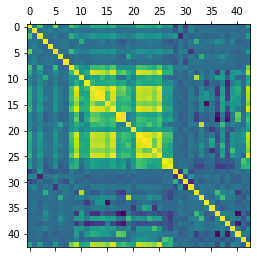

In [23]:
plt.matshow(df.corr())
plt.show()

In [24]:
# Creating a sub plot to limit number of relevant columns
sub_list = list(df)

In [25]:
print (sub_list)

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points', 'w_ace_pct', 'l_ace_pct', 'w_1st_pct', 'l_1st_pct', 'w_1stS_WinPct', 'l_1stS_WinPct', 'w_2ndS_WinPct', 'l_2ndS_WinPct', 'w_PpSgm', 'l_PpSgm', 'Sets_played']


In [27]:
# Creating list to remove items from sub_list
# Removing Id columns and all columns that cannot have a linear correlation
remove_list = ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level','tourney_date','match_num', 'winner_id','winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ioc', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ioc', 'score', 'best_of', 'round', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'  ]
for item in remove_list:
    sub_list.remove(item)
    

In [28]:
# Reviewing sub_list for possible other columns to be deleted
sub_list

['winner_ht',
 'winner_age',
 'loser_ht',
 'loser_age',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced',
 'w_ace_pct',
 'l_ace_pct',
 'w_1st_pct',
 'l_1st_pct',
 'w_1stS_WinPct',
 'l_1stS_WinPct',
 'w_2ndS_WinPct',
 'l_2ndS_WinPct',
 'w_PpSgm',
 'l_PpSgm',
 'Sets_played']

In [29]:
sub = df[sub_list]

In [30]:
sub

winner_ht  winner_age  loser_ht  loser_age  minutes  w_ace  w_df  \
0          178.0   29.845311     190.0  28.525667     91.0    1.0   2.0   
1          180.0   20.783025     183.0  33.971253     55.0    7.0   2.0   
2          175.0   26.800821     175.0  23.846680     58.0   12.0   2.0   
3          188.0   26.168378     185.0  23.520876    106.0    6.0   2.0   
4          185.0   23.334702     190.0  26.091718     76.0    3.0   4.0   
...          ...         ...       ...        ...      ...    ...   ...   
60694        NaN   20.895277       NaN  20.257358    115.0    0.0   4.0   
60695        NaN   21.590691       NaN  28.098563    161.0    7.0   2.0   
60696        NaN   23.498973       NaN  33.092402    250.0    4.0   8.0   
60697        NaN   17.730322       NaN  21.702943     98.0    2.0   2.0   
60698        NaN   19.268994       NaN        NaN     92.0    5.0   5.0   

       w_svpt  w_1stIn  w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  w_bpFaced  \
0        63.0     38.0      29.0      17.0     11.0        0.0        1.0   
1        52.0     31.0      23.0      13.0      7.0        4.0        4.0   
2        57.0     39.0      31.0       8.0      8.0        7.0        7.0   
3        73.0     41.0      28.0      15.0      9.0        8.0       11.0   
4        58.0     32.0      28.0      14.0     10.0        0.0        0.0   
...       ...      ...       ...       ...      ...        ...        ...   
60694    70.0     48.0      35.0      12.0     10.0        5.0        5.0   
60695    94.0     55.0      37.0      23.0     15.0        9.0       12.0   
60696    56.0     33.0      20.0      13.0     11.0        3.0        7.0   
60697    68.0     38.0      24.0      18.0     10.0        6.0        8.0   
60698    70.0     32.0      28.0      17.0     10.0        4.0        5.0   

       l_ace  l_df  l_svpt  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  \
0        8.0   7.0    70.0     38.0      32.0      13.0     10.0        5.0   
1        1.0   0.0    43.0     34.0      15.0       3.0      7.0        1.0   
2        2.0   1.0    47.0     33.0      18.0       7.0      8.0        2.0   
3        3.0   7.0    76.0     37.0      26.0      13.0     10.0        7.0   
4        5.0   1.0    73.0     45.0      30.0      14.0     10.0        2.0   
...      ...   ...     ...      ...       ...       ...      ...        ...   
60694    1.0   3.0    96.0     68.0      42.0      12.0     10.0       11.0   
60695    1.0   1.0    94.0     56.0      40.0      20.0     15.0        4.0   
60696    0.0   3.0    72.0     54.0      29.0       8.0     11.0        6.0   
60697    1.0   5.0    58.0     39.0      24.0       7.0     10.0        5.0   
60698    6.0   2.0    60.0     34.0      24.0      13.0     10.0        5.0   

       l_bpFaced  w_ace_pct  l_ace_pct  w_1st_pct  l_1st_pct  w_1stS_WinPct  \
0            7.0   0.015873   0.114286   0.603175   0.542857       0.763158   
1            6.0   0.134615   0.023256   0.596154   0.790698       0.741935   
2            6.0   0.210526   0.042553   0.684211   0.702128       0.794872   
3           13.0   0.082192   0.039474   0.561644   0.486842       0.682927   
4            4.0   0.051724   0.068493   0.551724   0.616438       0.875000   
...          ...        ...        ...        ...        ...            ...   
60694       13.0   0.000000   0.010417   0.685714   0.708333       0.729167   
60695        8.0   0.074468   0.010638   0.585106   0.595745       0.672727   
60696       10.0   0.071429   0.000000   0.589286   0.750000       0.606061   
60697        9.0   0.029412   0.017241   0.558824   0.672414       0.631579   
60698        8.0   0.071429   0.100000   0.457143   0.566667       0.875000   

       l_1stS_WinPct  w_2ndS_WinPct  l_2ndS_WinPct   w_PpSgm   l_PpSgm  \
0           0.842105       0.680000       0.406250  5.727273  7.000000   
1           0.441176       0.619048       0.333333  7.428571  6.142857   
2           0.545455       0.444444       0.500000  7.125000 

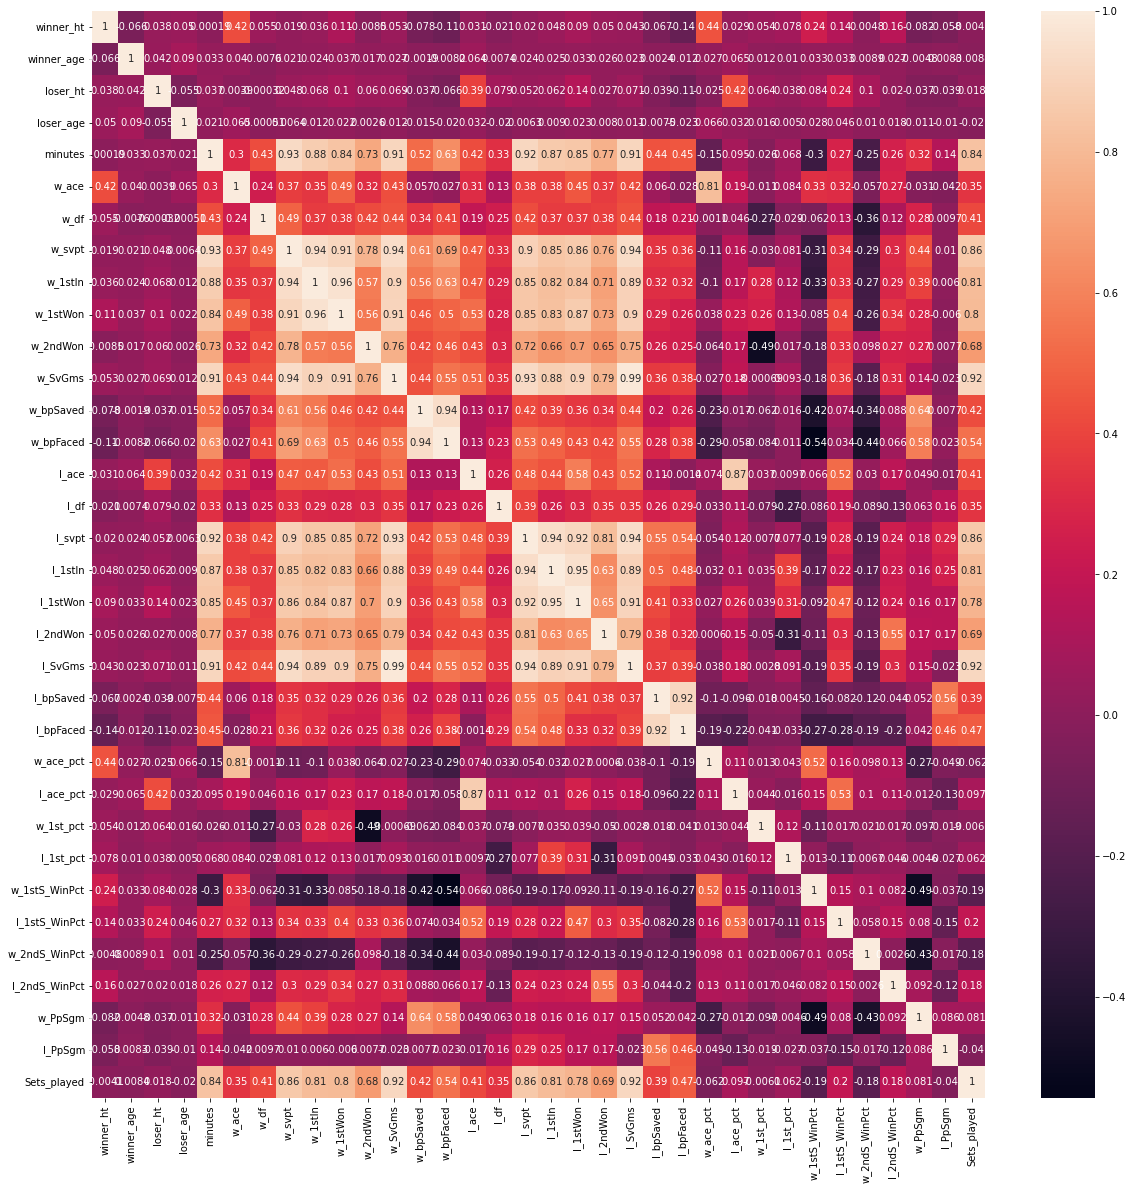

In [31]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## 4. Scatterplot

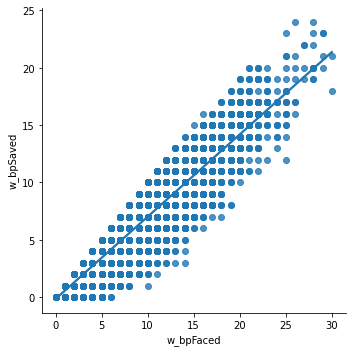

In [32]:
# Creating a scatterplot for the "w_bpfaced" and "w_bpsaved" columns

sns.lmplot(x = 'w_bpFaced', y = 'w_bpSaved', data = df)

This relations shows a strong positive relation (0,94), which makes perfect sense as you can only save a breakpoint if you are facing one. So with an increasing number of break points faced the breakpoints saved can potentially increase as well.

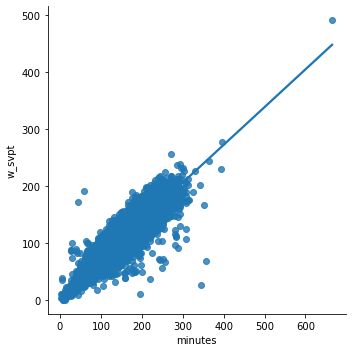

In [33]:
# Creating a scatterplot for the "minutes" and "w_svpt" columns 

sns.lmplot(x = 'minutes', y = 'w_svpt', data = df)

This again shows a strong positive correlation (0,93), as a match takes more time (which indicates it is a closer match) a greater number of service points will have to be played.

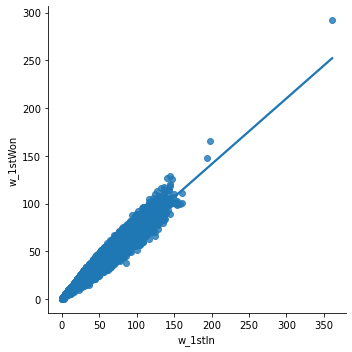

In [34]:
# Creating a scatterplot for the "w_1stIn" and "w_1stWon" columns

sns.lmplot(x = 'w_1stIn', y = 'w_1stWon', data = df)

The relationship between first serves in and first serves won also shows a strong positive relatin ship (0,96). Here again an increased number of first serves in is the prerequisite to be able to win a point on first serve.

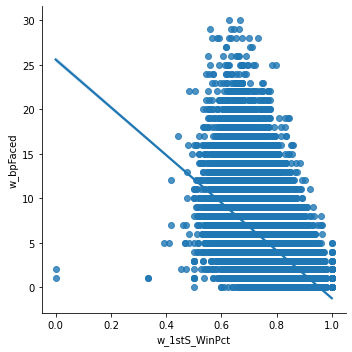

In [35]:
# Creating a scatterplot for the "w_1stS_WinPct" (Winner First Serve Win Percentage) and "w_bpFaced" columns
sns.lmplot(x = 'w_1stS_WinPct', y = 'w_bpFaced', data = df)

The first serve win percentage has a strong negative correlation with the break points saved (-0,54). If you win a lot of points on first serve, this decreases the probability of your opponent scoring more points than you overall.

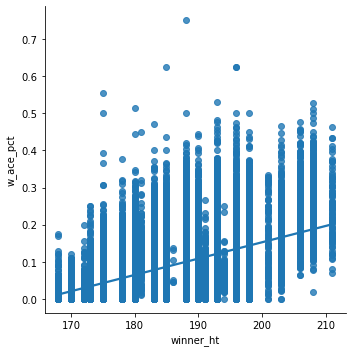

In [36]:
# # Creating a scatterplot for the "w_ht" and "w_ace_pct" columns
sns.lmplot(x = 'winner_ht', y = 'w_ace_pct', data = df)

The correlation between height and ace percentage is a moderate positive one (0,44). So a greater height can have a positive influence but does not have to.

## 5. Pair plot

In [37]:
# Creating a subset  for pair plot analysis
sub2 = df[['minutes', 'Sets_played', 'w_1stS_WinPct', 'w_PpSgm', 'w_svpt']]

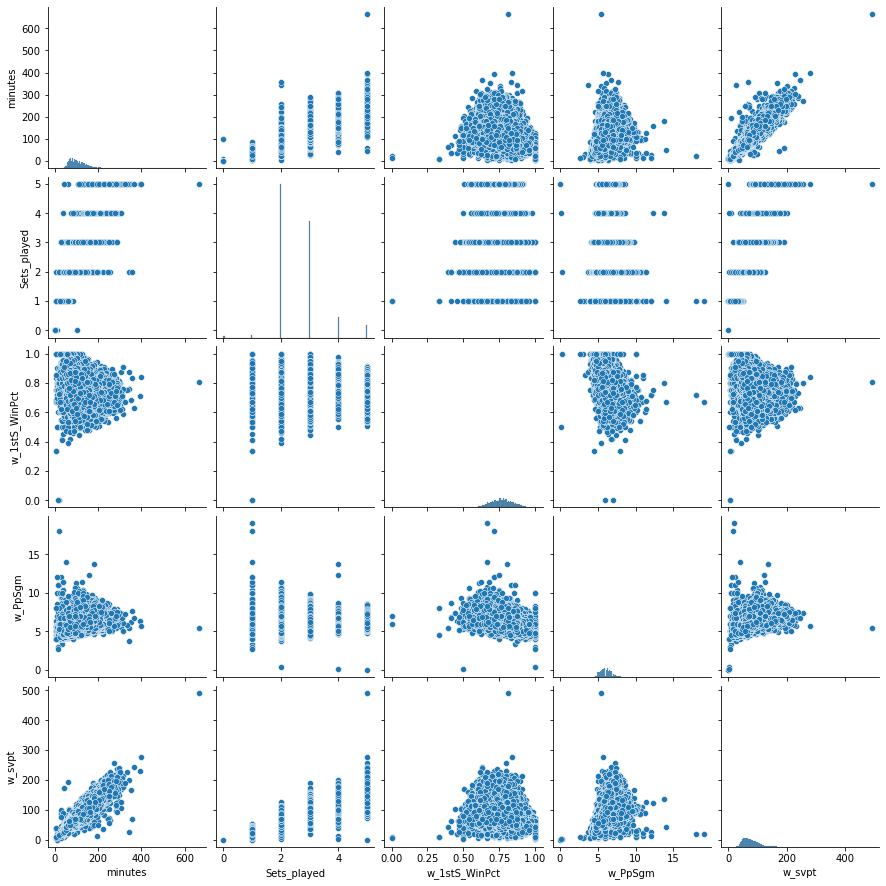

In [38]:
# Creating a pair plot 

g = sns.pairplot(sub2)

An interesting insight is that the average number of points played per winner's service game decrease when the number of sets played increaes. At the same time the win percentage on first serves has lower max values for 5 sets compared to fewer sets played.
Most matches range between 5-10 points played per service game.

## 6. Categorial Plot

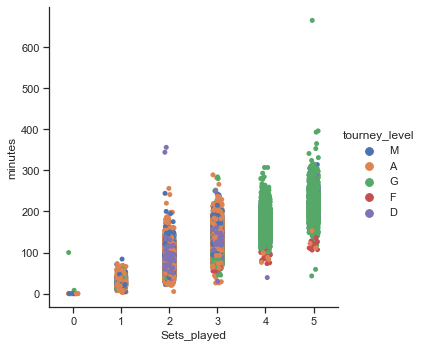

In [49]:
# Creating a categorial plot for match length compared to number of sets played and tournament level
sns.set(style="ticks")
g = sns.catplot(x="Sets_played", y="minutes", hue="tourney_level", data=df)

The plot shows that the match time increases with the number of sets played, especially at the grand slam level where a best if 5 sets is played.

In [57]:
# Spotted mistake in data where number of sets played does not match the best of 3 format
df.loc[df['tourney_name'] == 'NextGen Finals', 'best_of'] = 5
df.loc[(df['Sets_played'] > 3) & (df['best_of'] == 3), 'best_of'] = 5

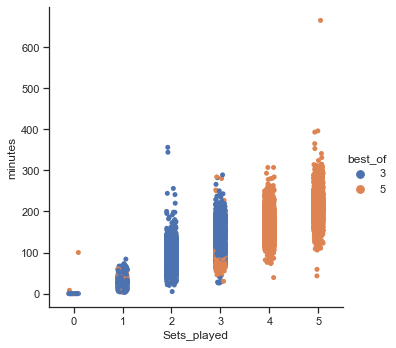

In [62]:
# Creating a categorial plot for match length compared to number of sets played and the number of max sets to be played (best of 3/5)
sns.set(style="ticks")
g = sns.catplot(x="Sets_played", y="minutes", hue="best_of", data=df)

You can see that best of 5 matches last a lot longer in total compared to the best of 3 matches, which makes sense, because the winner has to win a minimum of 3 sets, while 3 sets is the maximum amount of sets played in a best of 3 match

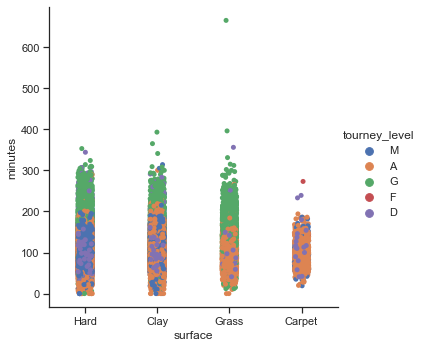

In [52]:
# Creating a categorial plot for match length per surface and tournament level
sns.set(style="ticks")
g = sns.catplot(x="surface", y="minutes", hue="tourney_level", data=df)

The plot shows the match length per surface, there are longer matches on hard court and clay, while matches on grass and carpet seem to be quicker. What has to be kept in mind is that there is no Grand Slam tournament played on carpet so there are little best of 5 matches played that take more time.

With regard to the research questions from the prior exercise, there is only one question that I have an indication for.
It is that height does have an influence on the percentage of aces hit per service point, however with 0,44 it is only considered to be a moderate relationship.
For further analysis I can imagine to compare the overall stats grouped by other factors such as surface, sets played, tournament level or even by round (e.g. 1st round vs semifinal or final).

Hypothesis to be tested:
1. Matches on Carpet last shorter than on other surfaces
2. Grandslam matches on grass last shorter than other surfaces
3. Longer matches have lower win percentages on 1st and 2nd Serve
4. Longer matches increase the amount of double faults
5. Ace rates are higher on carpet (and/or grass) compared to other surfaces
6. Matches play on clay have the highest number of points playd per service game
7. A winners first serve win percentage will be higher than the losers first serve win percentage